### Basics of Convnets using MNIST Dataset

The basic two building blocks of the Convolutional Neural Networks in Kera are the Conv2D and MaxPooling2D layers. 
Their uses are clear from their names. Here we will go through a basic code to understand the dimensionality of inputs, parameters and their effect.

In [1]:
### Instantiating a small Convnet

from keras import layers 
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


***Flattening the output is done once the Convolution operations have been performed so that the features extracted by the COnv layers can be fed to the Dense layers for Classification***

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [5]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [6]:
### Training the Convnets for MNIST Images

from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
train_images.shape

(60000, 28, 28, 1)

In [9]:
test_images.shape

(10000, 28, 28, 1)

In [10]:
train_labels.shape

(60000, 10)

In [11]:
test_labels.shape

(10000, 10)

In [12]:
history = model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.1798 - acc: 0.9440
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0461 - acc: 0.9855
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0317 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0258 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0195 - acc: 0.9942


In [13]:
history.history

{'loss': [0.1797563841022551,
  0.04606188074344148,
  0.031680704064775876,
  0.025791971720304962,
  0.019475687615196996],
 'acc': [0.9440333333333333,
  0.9855333333333334,
  0.9899666666666667,
  0.9925333333333334,
  0.9942]}

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 40us/step


In [15]:
test_loss

0.028868993924045027

In [16]:
test_acc

0.9912

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

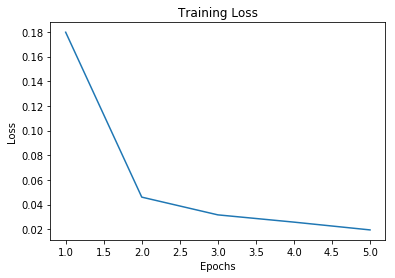

In [19]:
plt.plot(range(1,len(history.history['loss'])+1), history.history['loss'])

plt.title('Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

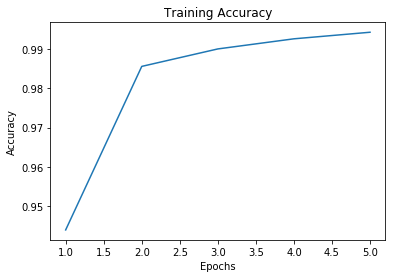

In [20]:
plt.plot(range(1,len(history.history['acc'])+1), history.history['acc'])

plt.title('Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


### Understanding the Convolution Operation

- The major difference between the Dense layers and the convolution features is that the Dense layers features tries to capture the Global Inference from the image, whereas the Convolution is a operation where the Kernal is slided across the Image frame. So this also helps to capture the effect of the neighbouring pixels into the picture. Majority of the cases when we deal with image data, one of the most baisc things that the model needs to perform is capture the edge detection and figure out what kinds of edges does the image contains. This is done very well by the COnvolution operation by considering the neighbouring pixels. The model overtime will learn the Kernal in most optimum way to definee the images. 


The key characterstics the COnvolution operations add are - 
1. ***The patterns they learn are translation invarient** - After learning a certain pattern in some part of the image, the model will be able to recognize it anywhere in the image. This makes the Conv nets data efficient. This won't be done by simply connecting the Densely connected layers together. This also maps well to Image recognition problems as most of visual world is fundamentally translation invarient. 

2. ***They can learn spatial heirarchy of features*** - A first Convoliution layer will learn small local patterns such as ***edges*** and a second convolution layer on top of it will be able to learn larger patterns made by such edges. This allows the convnets to efficiently learn increasingly complexand abstract visual concepts. (as the visual world is also spatially heirarchial)  

### Convolution, feature maps, and Dimensionality

- Convolutions operate over 3D tensors, called **feature maps**, with two spatial axis(Height and Width) as well as depth axis(Number of channels). 

- The convolution operation can be defines as placing the keranl on top of image, multiplying the corresponding values and then moving the keranl until the entire image has been processed. When the operation by one kernal is done it produces what we can call as the output feature map. 
- Now consider the MNIST example for instance, there we have an input of size (28,28,1) and the first Convolution layer we have defined contains 32 filters. The 32 filters will each be convoluted with the all the channels of image. 
- **Associate the Conv2d with the size of the output dimension or the Kernal Dimension. Even though the input image might have multiple channels the output is going to be a 2D matrix**
- So here we will have a output of size (26,26,32) as the number of channels is 1. If we would have had more channels in the input for example 3, the output would have been of dimensions (26,26,32). As the number of output filters is the user passed parameter. Now, to understand where the how an image of size (28,28) gets changed to (26,26) is very easy. For this 2 important terms will be introduced, one is **padding** and another is **stride**. 
- ***Padding*** - So, before applying the kernals to the image the image can be padded to conserve the effect of edges. So, usually the images are padded with floor(kernal/2) size. This can help us keep the dimensions of the output image same as the dimensions of the input image. But if not explicitely defined no zero padding is perfomed.

```python
padding = 'same'  ### Keeps the output dimesnions same as input dimensions
padding = 'valid' ### Esentially means no padding. This is the default setting
```

- ***Stride*** - So when we first keep the kernal on top left corner of the image, then slide the kernal one pixel to the right until the Kernal runs out of the image. When this happens we move the kernal to the left starting point and one pixel down. We keep repeating this until we exit the image from the right bottom corner of the image. (It would help, if you try to visualize this operation). Now, the value by which we moved the kernal in either direction can be called as the Stride value. If not defined explicitely the Keras considers the stride value as 1. Stride parameter can be smartly used to reduce the dimensionality of the output image and reduce the number of parameters. As the the size of output will decreases drastically with increase in stride. THis also means a tradeoff between the model complexity and accuracy. 

- One of the good resources if we need to visualize all operations performed by CNN- https://www.youtube.com/watch?v=FmpDIaiMIeA

### Max Pooling, Flattening Operations

- ***Max-Pooling operation*** - It is running a 2*2 filter over the image with the stride value of 2 and outputting the maximum value present in that filter. This is basically a convolution operation with kewrnal having all values 1 and performing max operation once the kernal element wise multiplication has been done. 
- One major thing this helps with is reducing the model complexity as it reduces the dimensionality and the number of paramters the model has to learn. 
- **Why removing Max-Pooling is wrong**
        - It isin't condusive to learning a spatial heirarchy of features. Suppose the max-pooling layers from the above setup has been removed. This will cause the third layer kernal of size(3*3) to get information coming from only a (7*7) image block. This would restrict the model to learn the global patterns in the image. 
        - Also after flattening the image the number of coefficients would be very high. As these features are then processed using Dense Neural Network this would cause the number of parameters to increase drastically. 